In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Read CSV File

In [6]:
df = pd.read_csv('Mobiles Dataset (2025).csv', encoding='latin1')

df.head(10)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
5,Apple,iPhone 16 Plus 512GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 274,999","INR 104,999","CNY 6,999",USD 999,"AED 3,599",2024
6,Apple,iPhone 16 Pro 128GB,206g,6GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 284,999","INR 99,999","CNY 6,999",USD 999,"AED 3,499",2024
7,Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 294,999","INR 104,999","CNY 7,099","USD 1,049","AED 3,699",2024
8,Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 314,999","INR 114,999","CNY 7,499","USD 1,099","AED 3,899",2024
9,Apple,iPhone 16 Pro Max 128GB,221g,6GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,"PKR 314,999","INR 109,999","CNY 7,499","USD 1,099","AED 3,799",2024


In [8]:
df.info()

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
count,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930.000000
unique,19,908,148,11,29,91,217,147,97,157,147,137,107,141,NaN
top,Oppo,Pad 128GB,190g,8GB,16MP,50MP,Snapdragon 8 Gen 2,"5,000mAh",6.7 inches,"PKR 79,999","INR 29,999","CNY 2,499",USD 499,"AED 1,499",NaN
freq,129,3,68,308,211,182,30,197,124,39,35,36,44,39,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.193548
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.862080
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.000000


# Data Cleaning

In [10]:
price_columns = [
    'Launched Price (Pakistan)', 'Launched Price (India)', 
    'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']

# Cleaning price columns
for col in price_columns:
    df[col] = df[col].str.replace(r'[^\d.]', '', regex=True).replace('', np.nan).astype(float)

In [12]:
# Cleaning 'RAM'. Finding average for cells with multiple numbers.
def average_ram(ram):
    numbers = [float(x) for x in re.findall(r'\d+\.?\d*', ram)]
    return sum(numbers) / len(numbers) if numbers else np.nan

df['RAM'] = df['RAM'].apply(average_ram)

# Cleaning 'Battery Capacity'
df['Battery Capacity'] = df['Battery Capacity'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Cleaning 'Mobile Weight
df['Mobile Weight'] = df['Mobile Weight'].str.replace('g', '').astype(float)

# Converting 'Launched Year' to integer
df['Launched Year'] = df['Launched Year'].astype(int)

# Cleaning 'Screen Size'
df['Screen Size'] = df['Screen Size'].str.extract(r'(\d+\.?\d*)\s*inches', expand=False).astype(float)

In [14]:
# Cleaning 'Front Camera' and 'Back Camera'

# Returning first 'MP' value from camera string
def extract_first_mp(camera_str):
    match = re.search(r'(\d+(\.\d+)?)\s*MP', str(camera_str))
    return float(match.group(1)) if match else np.nan

# Returning the count of cameras in the phone
def count_cameras(camera_str):
    if 'Triple' in camera_str:
        return 3
    elif 'Dual' in camera_str:
        return 2
    else:
        return len(re.findall(r'(\d+)\s*MP', str(camera_str)))

# Apply to 'Front Camera'
df['Front Camera (MP)'] = df['Front Camera'].apply(extract_first_mp)
df['Front Camera Count'] = df['Front Camera'].apply(count_cameras)

# Apply to 'Back Camera'
df['Back Camera (MP)'] = df['Back Camera'].apply(extract_first_mp)
df['Back Camera Count'] = df['Back Camera'].apply(count_cameras)

In [16]:
# Creating a 'Storage' column

# Creating a function extracting the storage size from 'model_name'
def extract_storage(model_name):
    match = re.search(r'(\d+)\s*(GB|TB)', model_name, re.IGNORECASE)
    if match:
        size = int(match.group(1))
        unit = match.group(2).upper()
        return size * 1024 if unit == "TB" else size
    return np.nan

# Applying the 'extract_storage' function to the 'model_name' column
df['Storage (GB)'] = df['Model Name'].apply(extract_storage)


# Removing storage info from 'model_name'
df['Model Name'] = df['Model Name'].str.replace(r'\s*\d+\s*(GB|TB)', '', regex=True)

In [18]:
# Renaming and dropping columns

df = df.rename(columns={'Mobile Weight': 'Weight (g)', 'RAM': 'RAM (GB)', 'Battery Capacity': 'Battery Capacity (mAh)', 'Screen Size': 'Screen Size (in)'})

df = df.drop(columns = ['Front Camera', 'Back Camera', 'Processor'])

In [20]:
# Removing duplicates from dataframe. In total, 15 entries were removed
df = df.drop_duplicates()

# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               915 non-null    object 
 1   Model Name                 915 non-null    object 
 2   Weight (g)                 915 non-null    float64
 3   RAM (GB)                   915 non-null    float64
 4   Battery Capacity (mAh)     915 non-null    float64
 5   Screen Size (in)           915 non-null    float64
 6   Launched Price (Pakistan)  914 non-null    float64
 7   Launched Price (India)     915 non-null    float64
 8   Launched Price (China)     915 non-null    float64
 9   Launched Price (USA)       915 non-null    float64
 10  Launched Price (Dubai)     915 non-null    float64
 11  Launched Year              915 non-null    int64  
 12  Front Camera (MP)          915 non-null    float64
 13  Front Camera Count         915 non-null    int64  
 14 

In [22]:
df.head(10)

,Company Name,Model Name,Weight (g),RAM (GB),Battery Capacity (mAh),Screen Size (in),Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Front Camera (MP),Front Camera Count,Back Camera (MP),Back Camera Count,Storage (GB)
0,Apple,iPhone 16,174.0,6.0,3600.0,6.1,224999.0,79999.0,5799.0,799.0,2799.0,2024,12.0,1,48.0,1,128.0
1,Apple,iPhone 16,174.0,6.0,3600.0,6.1,234999.0,84999.0,6099.0,849.0,2999.0,2024,12.0,1,48.0,1,256.0
2,Apple,iPhone 16,174.0,6.0,3600.0,6.1,244999.0,89999.0,6499.0,899.0,3199.0,2024,12.0,1,48.0,1,512.0
3,Apple,iPhone 16 Plus,203.0,6.0,4200.0,6.7,249999.0,89999.0,6199.0,899.0,3199.0,2024,12.0,1,48.0,1,128.0
4,Apple,iPhone 16 Plus,203.0,6.0,4200.0,6.7,259999.0,94999.0,6499.0,949.0,3399.0,2024,12.0,1,48.0,1,256.0
5,Apple,iPhone 16 Plus,203.0,6.0,4200.0,6.7,274999.0,104999.0,6999.0,999.0,3599.0,2024,12.0,1,48.0,1,512.0
6,Apple,iPhone 16 Pro,206.0,6.0,4400.0,6.1,284999.0,99999.0,6999.0,999.0,3499.0,2024,12.0,1,50.0,2,128.0
7,Apple,iPhone 16 Pro,206.0,8.0,4400.0,6.1,294999.0,104999.0,7099.0,1049.0,3699.0,2024,12.0,1,50.0,2,256.0
8,Apple,iPhone 16 Pro,206.0,8.0,4400.0,6.1,314999.0,114999.0,7499.0,1099.0,3899.0,2024,12.0,1,50.0,2,512.0
9,Apple,iPhone 16 Pro Max,221.0,6.0,4500.0,6.7,314999.0,109999.0,7499.0,1099.0,3799.0,2024,12.0,1,48.0,2,128.0


# Exploratory Data Analysis and Visualizations

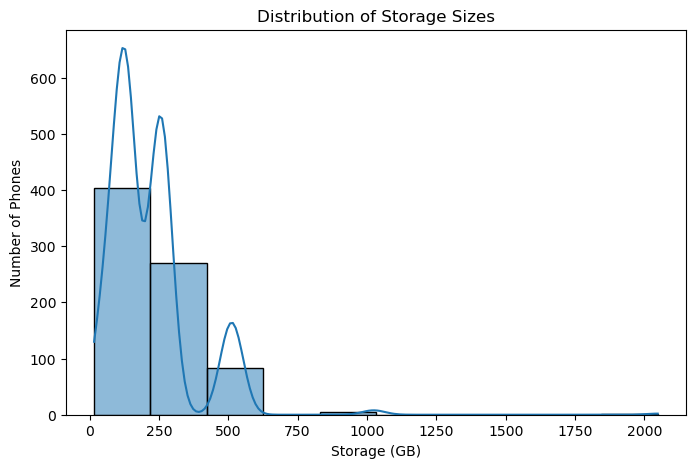

In [24]:
# Distribution of Storage Sizes
plt.figure(figsize=(8, 5))
sns.histplot(df['Storage (GB)'], bins=10, kde=True)
plt.title("Distribution of Storage Sizes")
plt.xlabel("Storage (GB)")
plt.ylabel("Number of Phones")
plt.show()

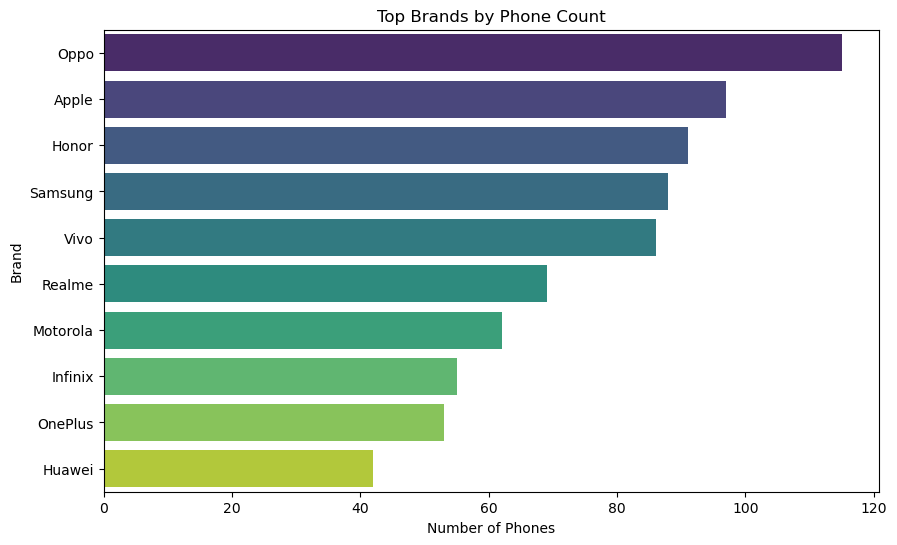

In [26]:
# Top mobile brands
top_brands = df['Company Name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, hue=top_brands.index, palette='viridis')
plt.title("Top Brands by Phone Count")
plt.xlabel("Number of Phones")
plt.ylabel("Brand")
plt.show()

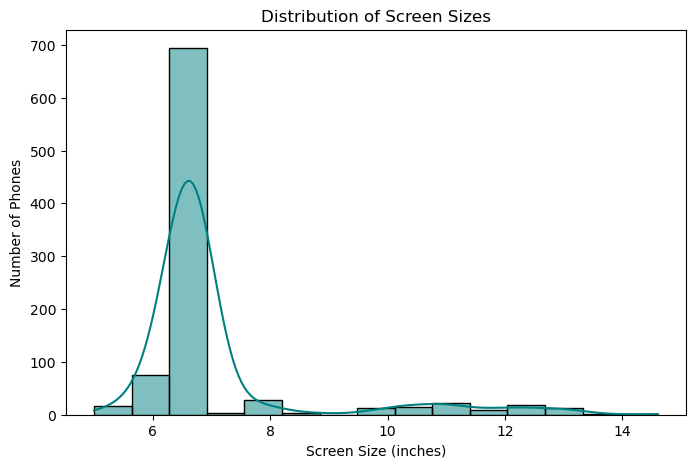

In [28]:
# Screen Size Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Screen Size (in)'], bins=15, kde=True, color='teal')
plt.title("Distribution of Screen Sizes")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Number of Phones")
plt.show()

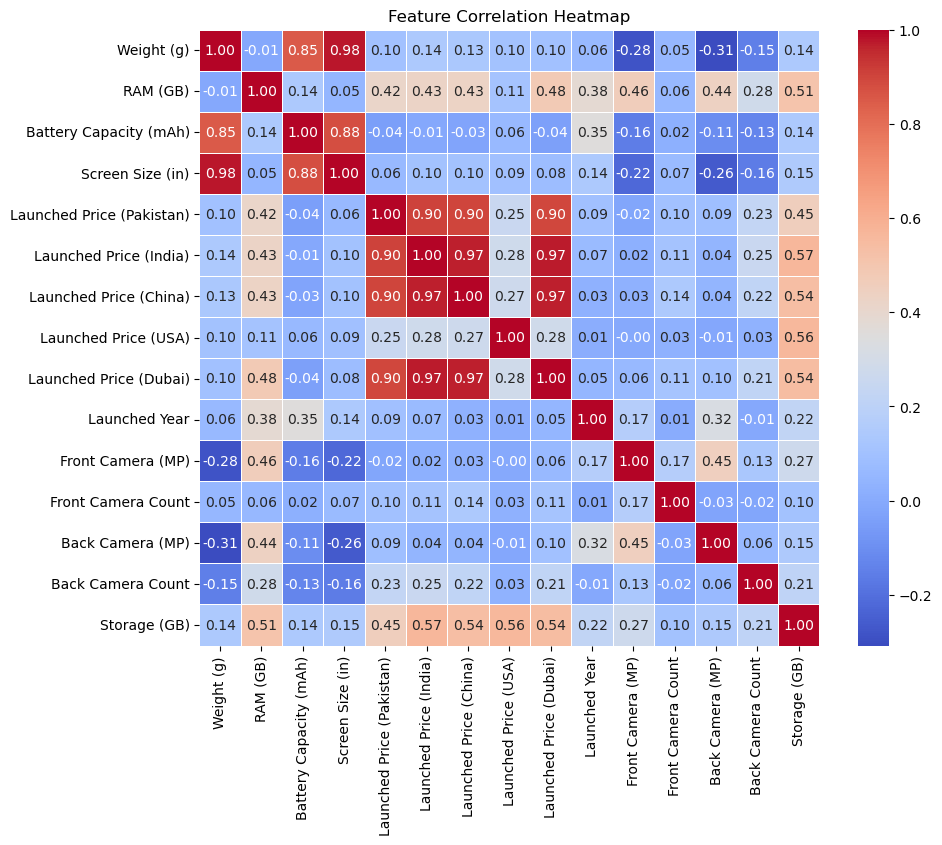

In [30]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

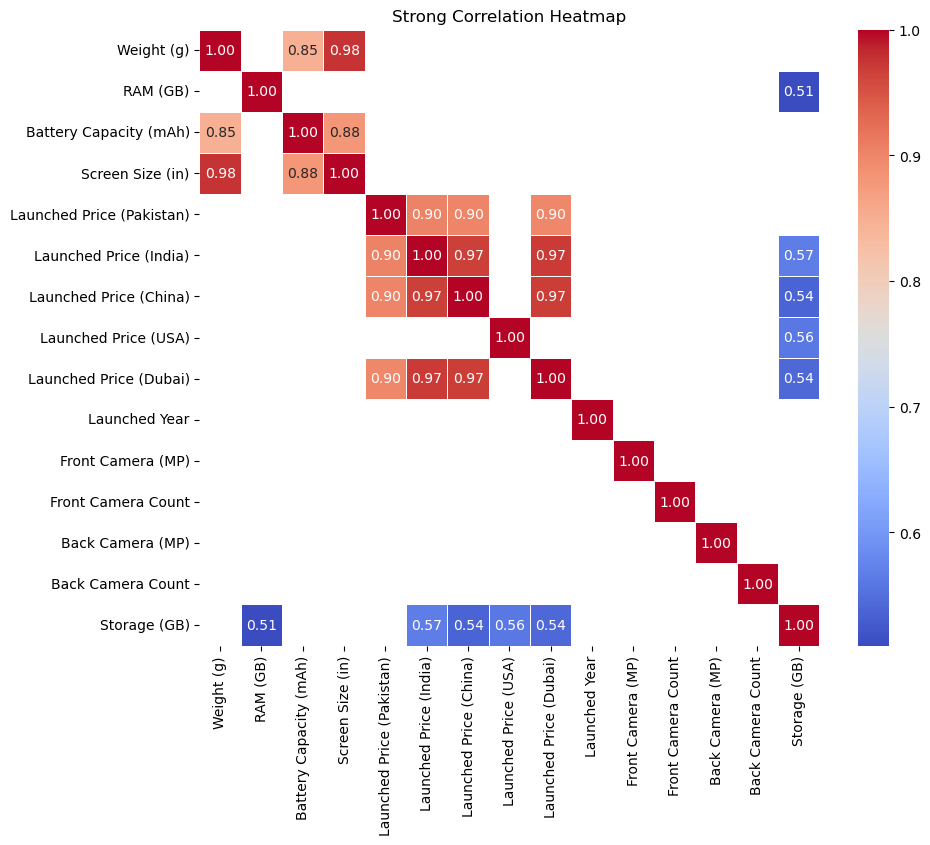

In [32]:
# Looking at the strongest correlations
threshold = 0.5
strong_corrs = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

plt.figure(figsize=(10, 8))
sns.heatmap(strong_corrs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Strong Correlation Heatmap")
plt.show()

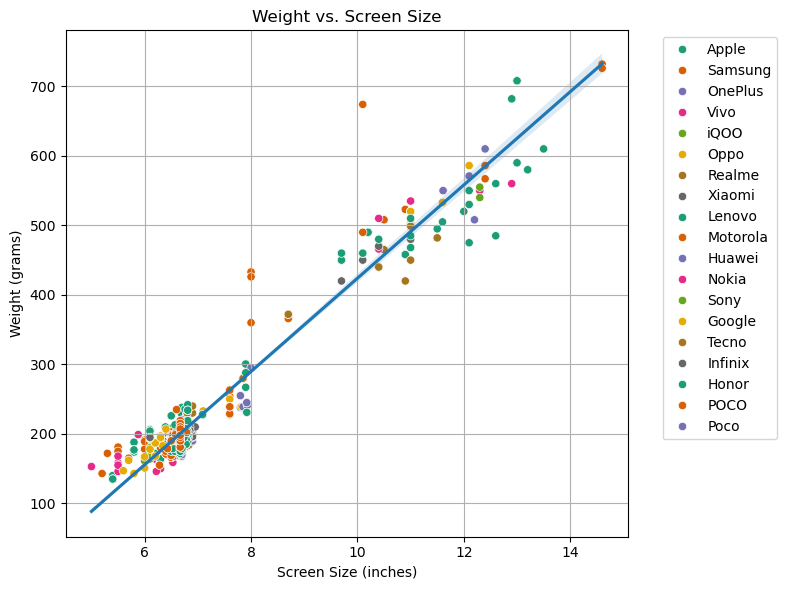

In [34]:
# Weight vs. Storage Size
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='Screen Size (in)', y='Weight (g)', hue='Company Name', palette='Dark2')
sns.regplot(data=df, x='Screen Size (in)', y='Weight (g)', scatter=False, ax=ax)
plt.title("Weight vs. Screen Size")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Weight (grams)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

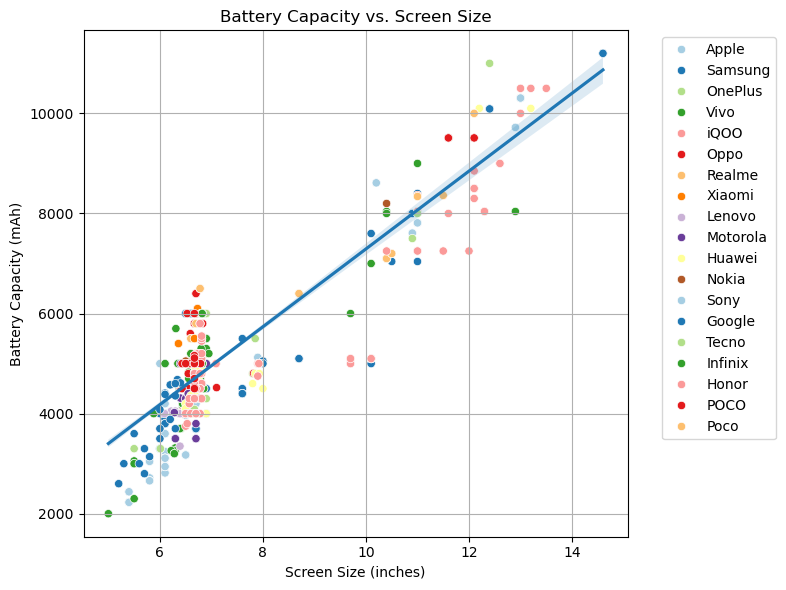

In [36]:
# Battery Capacity vs. Screen Size

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='Screen Size (in)', y='Battery Capacity (mAh)', hue='Company Name', palette='Paired')
sns.regplot(data=df, x='Screen Size (in)', y='Battery Capacity (mAh)', scatter=False, ax=ax)
plt.title("Battery Capacity vs. Screen Size")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Battery Capacity (mAh)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# Analysing the data of the top ten phone brands

# Computing price per spec unit for each device
df['Price per GB (RAM)'] = df['Launched Price (USA)'] / df['RAM (GB)']
df['Price per GB (Storage)'] = df['Launched Price (USA)'] / df['Storage (GB)']
df['Price per mAh'] = df['Launched Price (USA)'] / df['Battery Capacity (mAh)']
df['Price per inch'] = df['Launched Price (USA)'] / df['Screen Size (in)']
df['Price per MP (Front Camera)'] = df['Launched Price (USA)'] / df['Front Camera (MP)']
df['Price per MP (Back Camera)'] = df['Launched Price (USA)'] / df['Back Camera (MP)']

# Filtering the top brands
top_brands = df['Company Name'].value_counts().nlargest(10).index
filtered_df = df[df['Company Name'].isin(top_brands)]

# Averaging columns grouped by phone brands
grouped_df = filtered_df.groupby('Company Name')[['Price per GB (RAM)', 'Price per GB (Storage)', 'Price per mAh', 'Price per inch', 'Price per MP (Front Camera)', 'Price per MP (Back Camera)']].mean()

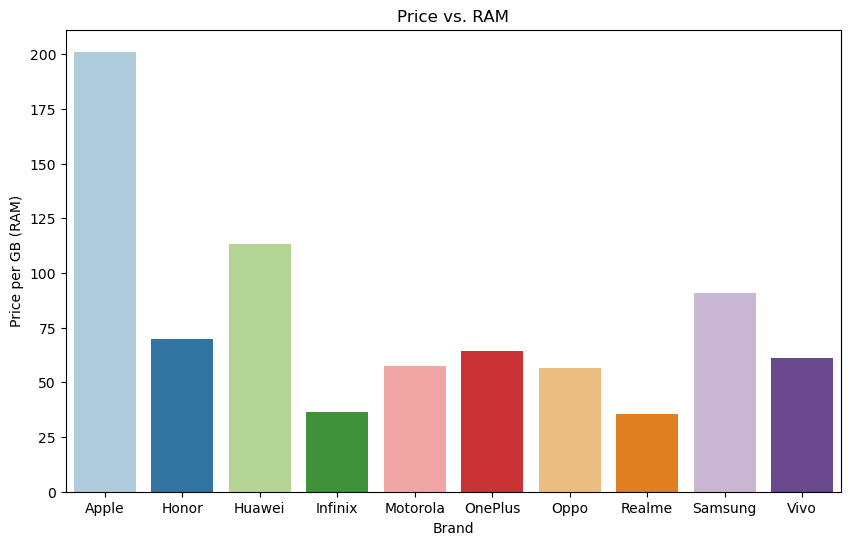

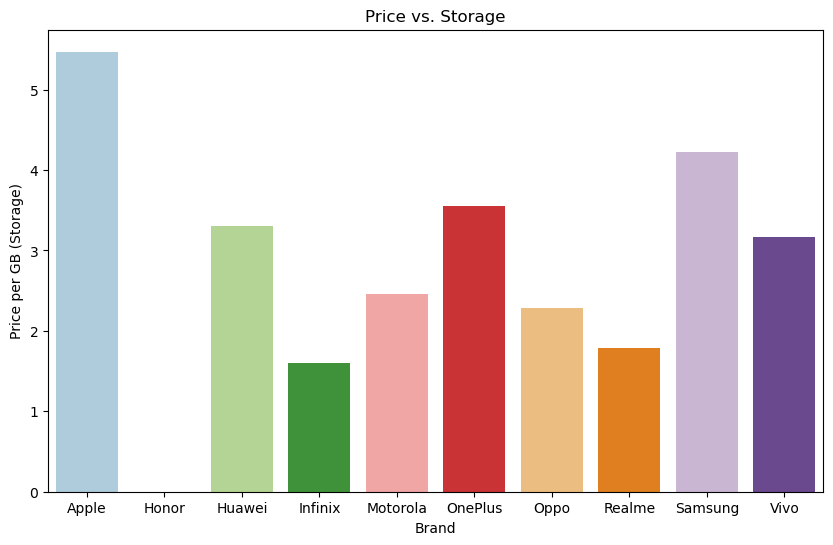

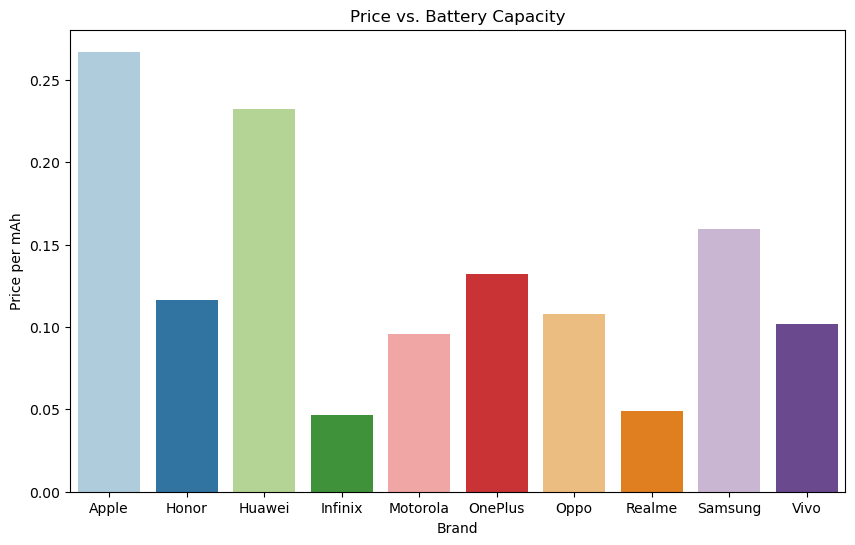

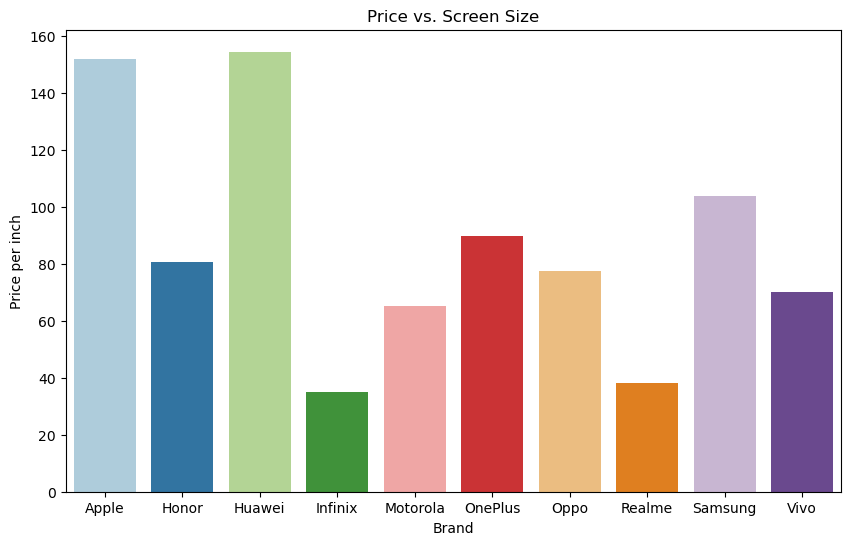

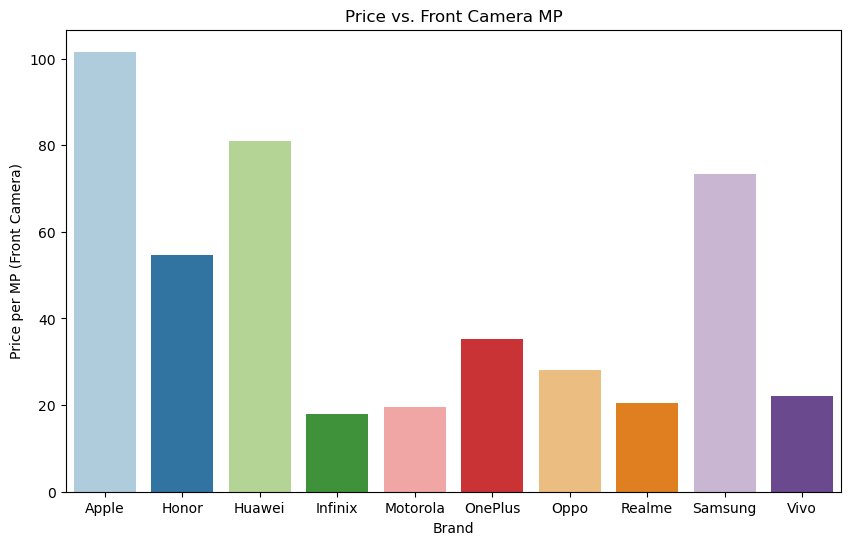

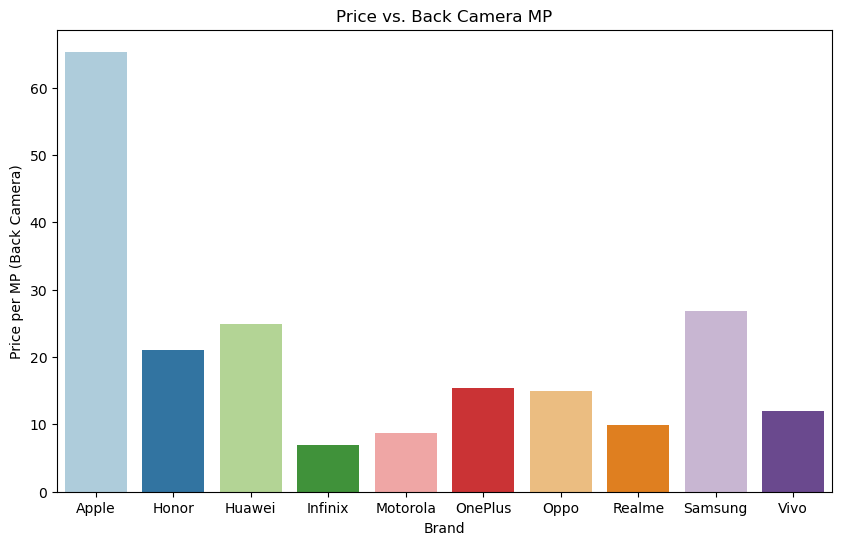

In [40]:
# Creating bar plots comparing top brands prices vs. specs

# Defining spec columns to compare
specs = [
    ('Price per GB (RAM)', 'Price vs. RAM'),
    ('Price per GB (Storage)', 'Price vs. Storage'),
    ('Price per mAh', 'Price vs. Battery Capacity'),
    ('Price per inch', 'Price vs. Screen Size'),
    ('Price per MP (Front Camera)', 'Price vs. Front Camera MP'),
    ('Price per MP (Back Camera)', 'Price vs. Back Camera MP')
]

# Comparing prices to spec columns
for col, title in specs:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_df, x='Company Name', y=col, hue='Company Name', palette='Paired')
    plt.title(title)
    plt.xlabel("Brand")
    plt.ylabel(col)
    plt.show()

In [42]:
# Comparing phone prices year over year. Only 2020-2024 compared as they have ~100 entries.
filtered_df_by_year = df[df['Launched Year'].between(2020,2024)]

# Averaging columns grouped by phone brands
grouped_df_by_year = filtered_df_by_year.groupby('Launched Year')[['Launched Price (USA)', 'Price per GB (RAM)', 'Price per GB (Storage)', 'Price per mAh']].mean()

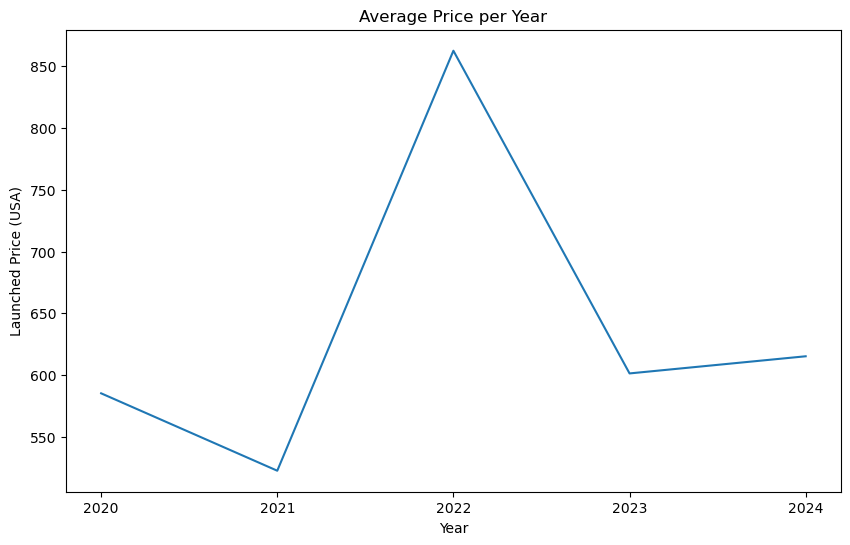

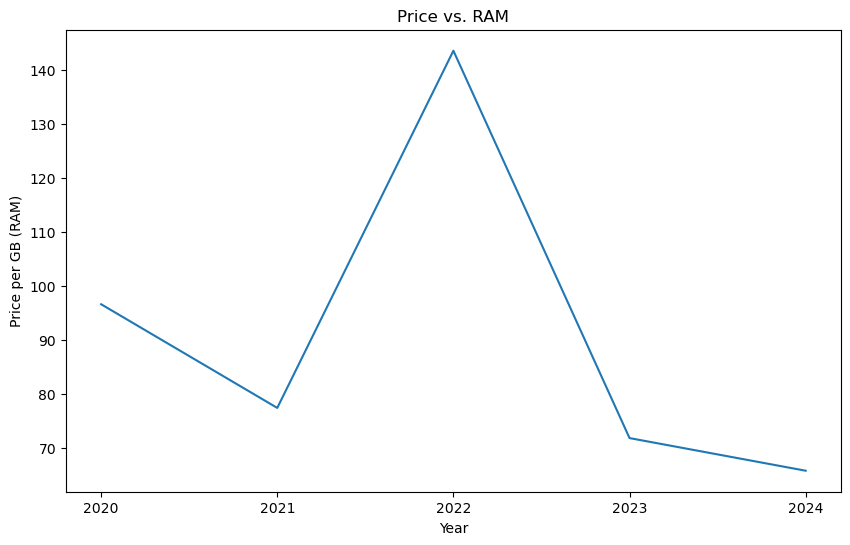

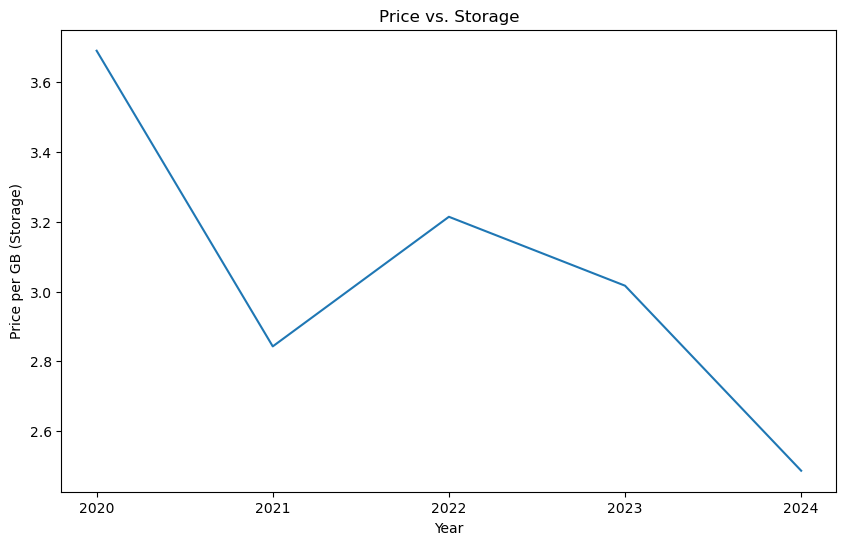

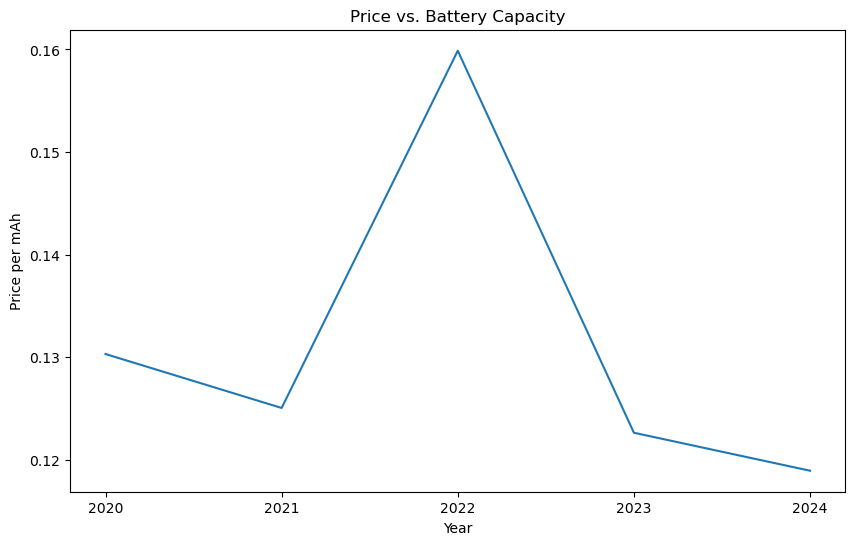

In [44]:
# Creating line plots comparing prices vs. specs per year

# Defining spec columns to compare
specs = [
    ('Launched Price (USA)', 'Average Price per Year'),
    ('Price per GB (RAM)', 'Price vs. RAM'),
    ('Price per GB (Storage)', 'Price vs. Storage'),
    ('Price per mAh', 'Price vs. Battery Capacity')
]

# Comparing prices to spec columns
for col, title in specs:
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(x='Launched Year', y=col, data=grouped_df_by_year)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.show()